   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.3 MB/s eta 0:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Number of detected faces: 16


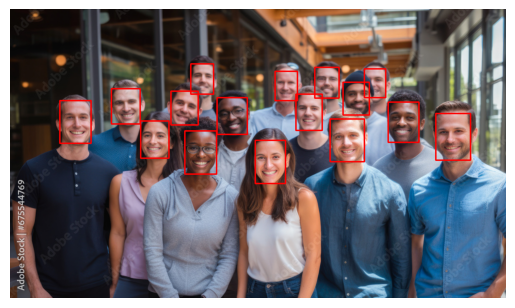

Model and data saved to tuning_mtcnn.pkl


In [ ]:
!pip install mtcnn

from matplotlib import pyplot as plt
from PIL import Image
from mtcnn import MTCNN
import cv2
import numpy as np
import pickle

# Load the image
image_path = '/content/Adobe.jpeg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image is None:
    print("Error: Unable to load the image.")
    exit()

# Initialize MTCNN
detector = MTCNN(
    min_face_size = 10,
    steps_threshold=[0.9, 0.7, 0.7],
    scale_factor=0.8,
    # or
    #thresholds=[0.6, 0.7, 0.7],
    #for normalisation -- image_mean=[127, 127, 127], image_std=[128, 128, 128],
)

# Detect faces
faces = detector.detect_faces(image_rgb)
num_faces = len(faces)

face_data = []

# Draw rectangles around detected faces
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # Store face data
    face_data.append({
        'box': face['box'],
        'confidence': face['confidence'],
        'keypoints': face['keypoints']
    })

# Display the number of detected faces
print(f'Number of detected faces: {num_faces}')

# Display the output image with detections
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

filename = 'tuning_mtcnn.pkl'

with open(filename, 'wb') as file:
    pickle.dump(face_data, file)

print(f'Model and data saved to {filename}')

In [ ]:
import cv2
import pickle
from matplotlib import pyplot as plt

Number of detected faces: 4


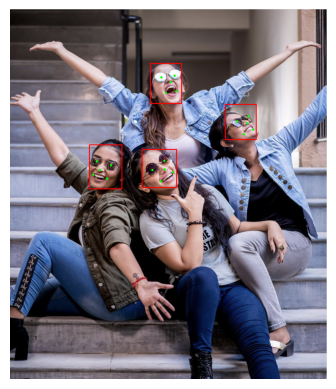

In [ ]:
# Load the image
image_path = '/content/Grp_Photo_Object_detection.png'
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image.")
    exit()

# Load the face data from the pickle file
filename = 'tuning_mtcnn.pkl'
with open(filename, 'rb') as file:
    face_data = pickle.load(file)

# Draw rectangles around detected faces and plot keypoints
for face in face_data:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Draw keypoints
    for key, point in face['keypoints'].items():
        cv2.circle(image, point, 2, (0, 255, 0), 2)

# Display the number of detected faces
num_faces = len(face_data)
print(f'Number of detected faces: {num_faces}')

# Display the output image with detections
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()